--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): age
Dependent Variable (Y): charges

Mean of X (age): 39.21
Mean of Y (charges): 13270.42
Variance of X: 197.40
Variance of Y: 146652372.15


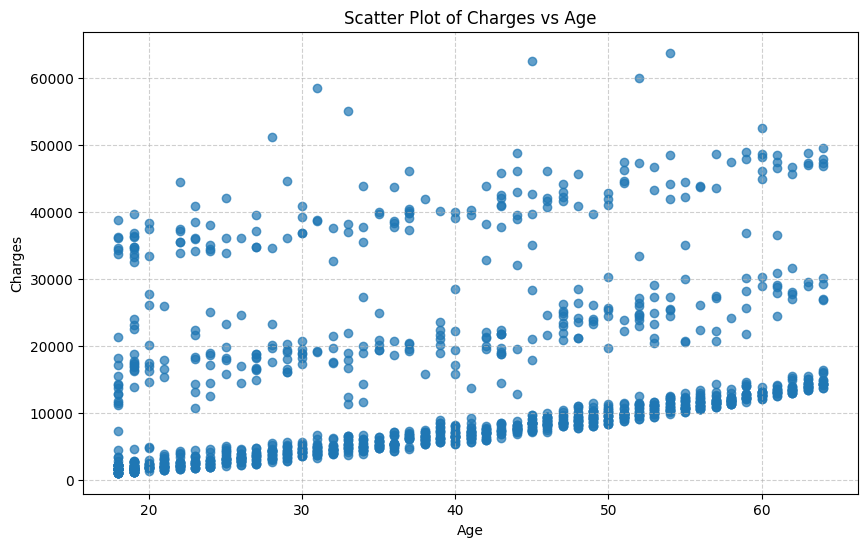


--- Task 2: Manual Calculation of Regression Parameters ---
Slope (β1): 257.7226
Intercept (β0): 3165.8850
Regression Equation: Ŷ = 3165.8850 + 257.7226X

--- Task 3: Visualization of the Fit ---


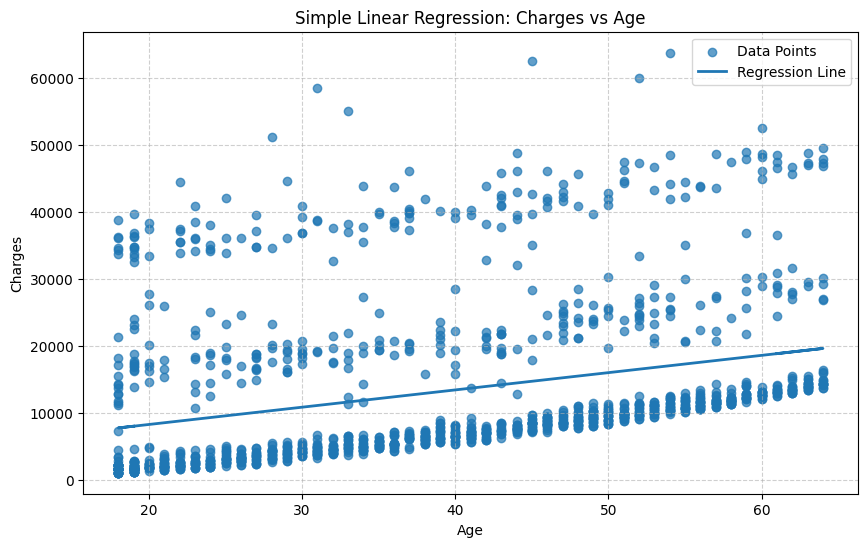


--- Task 4: Strength of Relationship ---
Pearson Correlation Coefficient (r): 0.2990
Coefficient of Determination (R²): 0.0894

--- Verification using scikit-learn ---
Manual β1: 257.7226 | SKL β1: 257.7226
Manual β0: 3165.8850 | SKL β0: 3165.8850
Manual R²: 0.0894 | SKL R²: 0.0894

--- Task 5: Reflection ---
In this task, I analyzed the relationship between age and insurance charges using simple linear regression. Age was used as the independent variable and insurance charges as the dependent variable. The regression results show a positive relationship, meaning insurance charges tend to increase with age.

From the scatter plot, the regression line shows an upward trend, but the data points are widely spread, so the fit is not very strong. The intercept represents the estimated charges when age is zero, which is not realistic but helps define the regression equation.

The correlation coefficient indicates a weak positive relationship, and the R-squared value shows that only a small 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- DATA SETUP (USING ACTUAL DATASET) ---
df = pd.read_csv("insurance.csv")

# Select required columns and remove missing values
df = df[['age', 'charges']].dropna()

# --- TASK 1: DATA SELECTION AND INITIAL VISUALIZATION ---
X = df['age']
Y = df['charges']

print("--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

# Summary Statistics
X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1)
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7)
plt.title("Scatter Plot of Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 2: MANUAL CALCULATION OF REGRESSION PARAMETERS ---
# ------------------------------------------------------------------------------

print("\n--- Task 2: Manual Calculation of Regression Parameters ---")

X_dev = X - X_mean
Y_dev = Y - Y_mean

numerator_b1 = (X_dev * Y_dev).sum()
denominator_b1 = (X_dev ** 2).sum()

beta_1 = numerator_b1 / denominator_b1
beta_0 = Y_mean - beta_1 * X_mean

print(f"Slope (β1): {beta_1:.4f}")
print(f"Intercept (β0): {beta_0:.4f}")
print(f"Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f}X")

# ------------------------------------------------------------------------------
# --- TASK 3: VISUALIZATION OF THE FIT ---
# ------------------------------------------------------------------------------

print("\n--- Task 3: Visualization of the Fit ---")

Y_pred = beta_0 + beta_1 * X

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, label="Data Points")
plt.plot(X, Y_pred, linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 4: STRENGTH OF RELATIONSHIP ---
# ------------------------------------------------------------------------------

print("\n--- Task 4: Strength of Relationship ---")

sum_squared_Y = (Y_dev ** 2).sum()
r = numerator_b1 / np.sqrt(denominator_b1 * sum_squared_Y)
R_squared = r ** 2

print(f"Pearson Correlation Coefficient (r): {r:.4f}")
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

# ------------------------------------------------------------------------------
# --- OPTIONAL: SCIKIT-LEARN VERIFICATION ---
# ------------------------------------------------------------------------------

try:
    from sklearn.linear_model import LinearRegression

    print("\n--- Verification using scikit-learn ---")
    X_skl = X.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X_skl, Y)

    print(f"Manual β1: {beta_1:.4f} | SKL β1: {model.coef_[0]:.4f}")
    print(f"Manual β0: {beta_0:.4f} | SKL β0: {model.intercept_:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²: {model.score(X_skl, Y):.4f}")

except ImportError:
    print("scikit-learn not installed.")

# ------------------------------------------------------------------------------
# --- TASK 5: REFLECTION ---
# ------------------------------------------------------------------------------

print("\n--- Task 5: Reflection ---")
print(
    "In this task, I analyzed the relationship between age and insurance charges using simple linear regression. "
    "Age was used as the independent variable and insurance charges as the dependent variable. "
    "The regression results show a positive relationship, meaning insurance charges tend to increase with age.\n\n"
    "From the scatter plot, the regression line shows an upward trend, but the data points are widely spread, "
    "so the fit is not very strong. The intercept represents the estimated charges when age is zero, "
    "which is not realistic but helps define the regression equation.\n\n"
    "The correlation coefficient indicates a weak positive relationship, and the R-squared value shows that "
    "only a small portion of the variation in insurance charges is explained by age. "
    "This model can still be useful for basic trend analysis, but more variables are needed for accurate prediction."
)
